In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy.stats import mannwhitneyu
from gensim.models import Word2Vec

In [2]:
model = Word2Vec.load('word2vec.model')

def get_sentence_vector(sentence, model, num_words=100):
    words = sentence.split()
    vector = np.zeros(100)  
    nwords = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            nwords += 1
    if nwords:
        vector /= nwords  
    return vector


def file_to_vectors(file_path, model):
    with open(file_path, 'r', encoding='utf8') as file:
        sentences = file.readlines()
    return np.array([get_sentence_vector(sentence, model) for sentence in sentences])

vectorized_file1 = file_to_vectors('datasets//new_noxin.txt', model)
vectorized_file2 = file_to_vectors('datasets//new_yes.txt', model)

X = np.vstack((vectorized_file1, vectorized_file2))

y = np.array([0] * len(vectorized_file1) + [1] * len(vectorized_file2))

Iteration 1, loss = 0.69590234
Validation score: 0.536585
Iteration 2, loss = 0.68934555
Validation score: 0.530488
Iteration 3, loss = 0.67710657
Validation score: 0.536585
Iteration 4, loss = 0.67484263
Validation score: 0.560976
Iteration 5, loss = 0.67338774
Validation score: 0.640244
Iteration 6, loss = 0.66014956
Validation score: 0.530488
Iteration 7, loss = 0.65637279
Validation score: 0.750000
Iteration 8, loss = 0.64683970
Validation score: 0.750000
Iteration 9, loss = 0.63374114
Validation score: 0.591463
Iteration 10, loss = 0.62502007
Validation score: 0.762195
Iteration 11, loss = 0.61364995
Validation score: 0.731707
Iteration 12, loss = 0.59935148
Validation score: 0.750000
Iteration 13, loss = 0.58791217
Validation score: 0.750000
Iteration 14, loss = 0.57372010
Validation score: 0.719512
Iteration 15, loss = 0.56112950
Validation score: 0.750000
Iteration 16, loss = 0.55026779
Validation score: 0.737805
Iteration 17, loss = 0.54009315
Validation score: 0.768293
Iterat

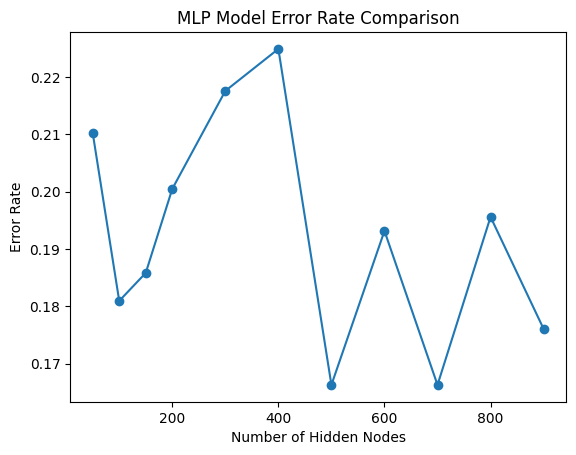

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def mlp_model(hidden_layer_sizes, learning_rate=0.01, n_epochs=300, l2_reg=0.00005):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                        learning_rate_init=learning_rate, 
                        max_iter=n_epochs, 
                        early_stopping=True, 
                        tol=1e-6, 
                        random_state=1, 
                        activation='logistic', 
                        solver='adam', 
                        warm_start=True, 
                        alpha=0.00005,  
                        verbose=10)
    return clf


hidden_layer_sizes = [50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900]
errors = []

for n_hidden in hidden_layer_sizes:
    clf = mlp_model(hidden_layer_sizes=(n_hidden,))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

    print(f"Hidden nodes: {n_hidden}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='binary'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='binary'):.4f}\n")

plt.plot(hidden_layer_sizes, errors, marker='o')
plt.title('MLP Model Error Rate Comparison')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Error Rate')
plt.show()

Iteration 1, loss = 0.97331473
Validation score: 0.536585
Iteration 2, loss = 0.81753324
Validation score: 0.475610
Iteration 3, loss = 0.70231135
Validation score: 0.475610
Iteration 4, loss = 0.70777716
Validation score: 0.743902
Iteration 5, loss = 0.66980637
Validation score: 0.548780
Iteration 6, loss = 0.63566347
Validation score: 0.573171
Iteration 7, loss = 0.62451893
Validation score: 0.743902
Iteration 8, loss = 0.61745651
Validation score: 0.603659
Iteration 9, loss = 0.60009987
Validation score: 0.579268
Iteration 10, loss = 0.58007842
Validation score: 0.774390
Iteration 11, loss = 0.56408407
Validation score: 0.603659
Iteration 12, loss = 0.54875409
Validation score: 0.804878
Iteration 13, loss = 0.53375462
Validation score: 0.804878
Iteration 14, loss = 0.52479776
Validation score: 0.810976
Iteration 15, loss = 0.50971628
Validation score: 0.725610
Iteration 16, loss = 0.51725227
Validation score: 0.743902
Iteration 17, loss = 0.51496630
Validation score: 0.786585
Iterat

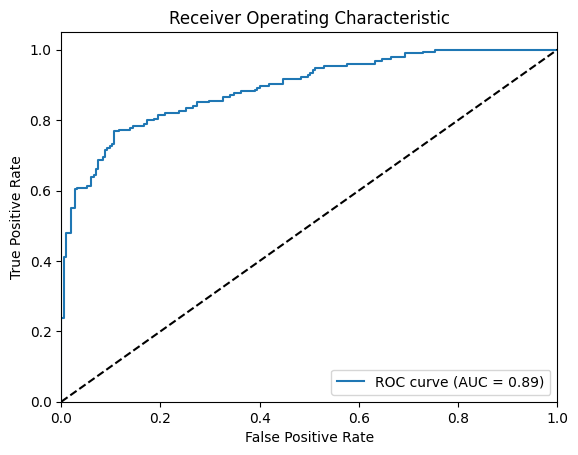

In [4]:
from sklearn.metrics import roc_curve, auc
import joblib
#650
clf = mlp_model(hidden_layer_sizes=(650,))
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 获取正类的预测概率

joblib.dump(clf, 'mlp_model_650nodes.pkl')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Performance for 650 hidden nodes:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Iteration 1, loss = 0.83626709
Validation score: 0.536585
Iteration 2, loss = 0.76454057
Validation score: 0.512195
Iteration 3, loss = 0.68818581
Validation score: 0.512195
Iteration 4, loss = 0.68965277
Validation score: 0.536585
Iteration 5, loss = 0.66221686
Validation score: 0.536585
Iteration 6, loss = 0.65812504
Validation score: 0.554878
Iteration 7, loss = 0.65366773
Validation score: 0.585366
Iteration 8, loss = 0.63626145
Validation score: 0.756098
Iteration 9, loss = 0.59899839
Validation score: 0.652439
Iteration 10, loss = 0.58650986
Validation score: 0.762195
Iteration 11, loss = 0.56775524
Validation score: 0.621951
Iteration 12, loss = 0.56117636
Validation score: 0.743902
Iteration 13, loss = 0.54477196
Validation score: 0.768293
Iteration 14, loss = 0.52994723
Validation score: 0.768293
Iteration 15, loss = 0.51601620
Validation score: 0.786585
Iteration 16, loss = 0.50526998
Validation score: 0.786585
Iteration 17, loss = 0.49417984
Validation score: 0.768293
Iterat

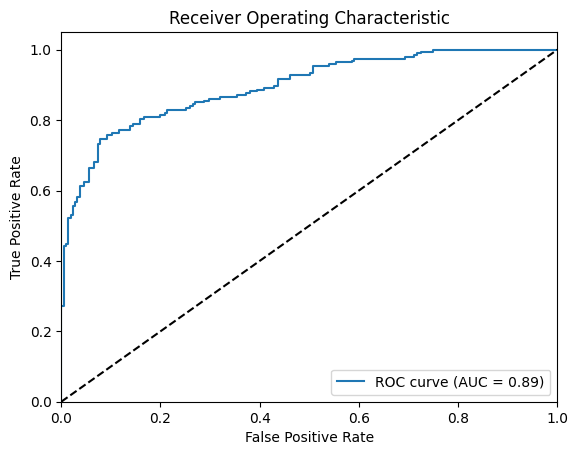

In [5]:
from sklearn.metrics import roc_curve, auc
import joblib

# 450
clf = mlp_model(hidden_layer_sizes=(450,))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 获取正类的预测概率

joblib.dump(clf, 'mlp_model_450nodes.pkl')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Performance for 450 hidden nodes:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 随机分类器的 ROC 曲线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()